### Importation du module "Pandas", nécessaire à l'analyse du fichier .csv

In [5]:
import pandas as pd

 #### Importation de "Numpy". Ce module va par la suite nous aider à calculer le type d'agrégation (nombre de valeurs).

In [6]:
import numpy as np

### Lecture du fichier .csv

In [130]:
datamuseums = pd.read_csv("liste-des-musees-de-france-2021.csv", sep=";")

#### Visualisation du fichier

In [55]:
datamuseums

,osm_id,name,number,street,postal_code,city,country,country_code,lat,lon,website,email,phone,fax,tags,description,date_added,wikidata
0,4540234591,3 bis f,109,Avenue du Petit BarthÈlÈmy,13617.0,Aix-en-Provence,France,fr,43.521207,5.439875,http://www.3bisf.com,contact@3bisf.com,33442161775,NaN,osm:museum;art:art contemporain,NaN,"44116,00764",NaN
1,4388745689,A casa di Losari,NaN,T 30,20226.0,BelgodËre,France,fr,42.638732,9.007660,NaN,NaN,NaN,NaN,osm:museum,NaN,"43338,9394",NaN
2,4426176194,¿ l'homme volant,35,Grande Rue,72300.0,SablÈ-sur-Sarthe,France,fr,47.839656,-0.334043,NaN,NaN,33243950736,NaN,osm:museum;type:centre d'interpretation,NaN,"42644,46366",NaN
3,7652598615,Abbadiale - Maison des arts,NaN,Rue du Gabizos,65400.0,Arras-en-Lavedan,France,fr,42.990826,-0.128057,https://www.abbadiale.fr/,NaN,33633170714,NaN,osm:museum,NaN,"44120,04668",NaN
4,121580330,Abbaye,NaN,Rue de l'Abbaye,39210.0,Ch‚teau-Chalon,France,fr,46.753866,5.624296,NaN,NaN,NaN,NaN,osm:museum;art:architecture,NaN,"43102,54919",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3779,1348524503,Vivarium du Moulin,NaN,Rue Principale,68610.0,Thann-Guebwiller,France,fr,47.942258,7.149613,NaN,NaN,NaN,NaN,osm:museum,NaN,"40747,87175",NaN
3780,577287841,Voyage au Temps des impressionnistes,NaN,Rue de LÈry,95430.0,Auvers-sur-Oise,France,fr,49.072057,2.166167,NaN,NaN,NaN,NaN,osm:museum,NaN,"41141,72722",NaN
3781,145062184,Wines and Spirits Museum,NaN,Corniche Bonaparte,83150.0,Bandol,France,fr,43.128031,5.749484,NaN,NaN,NaN,NaN,osm:museum,NaN,"42367,71351",NaN
3782,82988725,Xanxotea,NaN,La Place,64240.0,Isturits,France,fr,43.364834,-1.203580,http://www.xanxotea.com/,NaN,NaN,NaN,osm:museum,MusÈe ethnographique Xanxotea pour dÈcouvrir l...,"44129,58078",NaN


# Analyse du fichier

## Combien y-a-t-il de musées en France métropolitaine ?

In [233]:
datamuseums.describe(include="all").head(3)

,osm_id,name,number,street,postal_code,city,country,country_code,lat,lon,website,email,phone,fax,tags,description,date_added,wikidata
count,3784.0,3784,743,3771,3728.0,3782,3784,3784,3784.0,3784.0,1636,301,1211,0.0,3782,226,3775,1147
unique,NaN,533,196,2932,NaN,2295,2,2,NaN,NaN,1585,295,1163,NaN,119,206,3331,1133
top,NaN,MusÈe,1,Grande Rue,NaN,Paris,France,fr,NaN,NaN,http://www.ville-orleans.fr,musees@ville.angers.fr,33325868686,NaN,osm:museum,EcomusÈe,"43940,5849",Q3329951


#### En observant la colonne "name", et la ligne "count", on apprend qu'il y a 3784 musées référencés en France. 



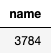



(Il ne faut pas prendre en compte la ligne "unique" qui donne un résultat inférieur, montrant ainsi que plusieurs musées différents ont le même nom.)

## Dans quelle(s) ville(s) y-a-t-il de plus de musées ?

#### Dans le tableau de la question précédente, on peut apprendre que la ville avec le plus de musée (= ville le plus de fois présente dans la colonne "city", est Paris.

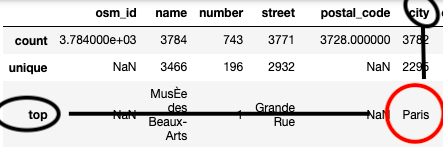

### Autre méthode

In [305]:
#Réalisation d'un tableau recensant le nombre de musées par ville
museumpercity = datamuseums.pivot_table(
     index='city',
     values='name',
     aggfunc=np.count_nonzero
)

In [87]:
museumpercity

,name
city,
Abbeville,1
Abilly,1
Ablain-Saint-Nazaire,2
Abondance,1
Agde,2
...,...
…trepigney,2
…tretat,2
…tueffont,1


### Top 3 des villes avec le plus de musées

In [234]:
museumpercity.sort_values('name',ascending=False)[:3]

,name
city,
Paris,175
Lyon,33
Marseille,28


#### La ville avec le plus de musées est bien Paris, avec 175 musées. Vient ensuite la ville de Lyon puis de Marseille.

## Quel est le nombre moyen de musées par ville ?

In [14]:
museumpercity.mean(axis='index')

name    1.64793
dtype: float64

#### Le nombre moyen est de 1,64 musées par ville. Il y a donc un peu moins de deux musées par ville en moyenne.

## Quel est le nombre médian de musées par ville ?

In [15]:
museumpercity.median(axis='index')

name    1.0
dtype: float64

#### Le nombre médian de musées par ville est 1. La majorité des villes n'ont donc qu'un seul musée.

## Comment sont répartis les musées par type (en pourcentage) ?

#### ...Je ne vois pas comment faire ça 🤷‍♀️. Je n'arrive pas à trouver les occurrences dans les colonnes (même problème que pour Napoléon).

## Combien y-a-t-il de musées dont le nom commence par "Château" ?

##### Le fichier .csv présente une erreur de syntaxe lié aux accent. Je remplace donc tous les "," par "â", car tous les "Château" sont actuellement indiqués "Ch,teau".

In [273]:
datachateau = datamuseums['name'].astype(str).str.replace(',','â')

In [274]:
#J'isole tous les premiers mots de la colonne "name", et je les comptes
datachateaubis = datachateau.str.split(' ').str[0].value_counts()
datachateaubis.head(10)

MusÈe       1871
Maison       345
La           127
Le           103
EcomusÈe      81
Espace        73
Centre        72
Ch‚teau       48
Les           33
Galerie       23
Name: name, dtype: int64

#### Il y a donc 48 musées dont le nom commence par "Château". (Je n'arrive pas à comprendre pourquoi la virgule n'a pas été remplacée par "â"...)

## Pour combien de musées dispose-t-on de l'adresse du site web ?

In [112]:
# Mise en place d'un tableau qui référence toutes les villes avec un email
museumwithwebsite = datamuseums.pivot_table(
     index='website',
     values='name',
     aggfunc=np.count_nonzero
)

In [113]:
# 5 premières lignes du tableau
museumwithwebsite.head(5)

,name
website,
asepam.org,1
bibliotheque@rouen.fr,1
http:///www.culture.gouv.fr/champagne-ardenne/2culture/musee_france/musee_bazeilles.html,1
http://MOSSET.FR/ART/TOUR-DES-PARFUMS,1
http://a-mi.fr/,1


In [114]:
# Somme de toutes ces villes
museumwithwebsite.sum(axis='index')

name    1636
dtype: int64

#### Il y a donc 1636 musées pour qui nous disposons de l'adresse du site web.

## Quel département français possède le plus de musées sur son territoire ?

#### Dans le fichier .csv, nous n'avons que les code postaux. Pour travailler avec les départements, il est donc nécessaire de ne garder que les deux premiers chiffres du code postal, correspondants au département.

In [83]:
#pour utiliser la formule souhaitée, de transforme mes integers en string.
datamuseums['postal_code'] = datamuseums['postal_code'].astype(str).str[:2]
#apparemment pas nécessaire de le reformater en .astype(np.int64)...

#Comme les codes-postaux n'en sont plus. Je change la colonne "postal_code" en "departement"
datamuseums.rename( columns={'postal_code':'departement'} ,inplace=True)

#### Vérification

In [84]:
datamuseums.head(5)

,osm_id,name,number,street,departement,city,country,country_code,lat,lon,website,email,phone,fax,tags,description,date_added,wikidata
0,4540234591,3 bis f,109,Avenue du Petit BarthÈlÈmy,13,Aix-en-Provence,France,fr,43.521207,5.439875,http://www.3bisf.com,contact@3bisf.com,33442161775,NaN,osm:museum;art:art contemporain,NaN,"44116,00764",NaN
1,4388745689,A casa di Losari,NaN,T 30,20,BelgodËre,France,fr,42.638732,9.007660,NaN,NaN,NaN,NaN,osm:museum,NaN,"43338,9394",NaN
2,4426176194,¿ l'homme volant,35,Grande Rue,72,SablÈ-sur-Sarthe,France,fr,47.839656,-0.334043,NaN,NaN,33243950736,NaN,osm:museum;type:centre d'interpretation,NaN,"42644,46366",NaN
3,7652598615,Abbadiale - Maison des arts,NaN,Rue du Gabizos,65,Arras-en-Lavedan,France,fr,42.990826,-0.128057,https://www.abbadiale.fr/,NaN,33633170714,NaN,osm:museum,NaN,"44120,04668",NaN
4,121580330,Abbaye,NaN,Rue de l'Abbaye,39,Ch‚teau-Chalon,France,fr,46.753866,5.624296,NaN,NaN,NaN,NaN,osm:museum;art:architecture,NaN,"43102,54919",NaN


In [91]:
# Réalisation d'un tableau recensant le nombre de musées par département
museumperdepartment = datamuseums.pivot_table(
     index='departement',
     values='name',
     aggfunc=np.count_nonzero
)

In [92]:
museumperdepartment

,name
departement,
10,15
11,40
12,57
13,90
14,69
...,...
93,14
94,17
95,29


In [93]:
# Visualisation du top3 des départements avec le plus de musées
museumperdepartment.sort_values('name',ascending=False)[:3]

,name
departement,
75,180
59,97
33,94


#### Le département avec le plus de musées est sans surprise le 75 (Paris).

## Quel département français possède le moins de musées sur son territoire ?

In [94]:
# Visualisation du flop3 des départements avec le moins de musées
museumperdepartment.sort_values('name',ascending=True)[:3]

,name
departement,
98,8
48,9
90,10


#### Le département avec le moins de musées est le 98 (France d'outre-mer). En métropôle, c'est le 48 (Lozère) qui possède le moins de musées.

## Combien de musées ont "Napoléon" dans leur nom ?

##### Le fichier .csv présente une erreur de syntaxe lié aux accent. Je remplace donc tous les "È" par "é", car tous les "Napoléon" sont actuellement indiqués "NapolÈon".

In [294]:
datamuseumsnap['name'] = datamuseums['name'].str.replace('È','é')

In [303]:
datamuseumsnap[datamuseumsnap['name'].str.contains("Napoléon")]

,name


#### ...Je n'y arrive pas 🤷‍♀️

# Proposition de deux axes d'analyse supplémentaires

## Référencement des musées participants à la nuit européenne des musées en mai 2022

tableau de données = https://data.culture.gouv.fr/explore/dataset/nuit-des-musees-2022/table/?disjunctive.location_region&disjunctive.accessibility_label_fr&location=5,46.81407,1.65072&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6ImFnZV9taW4iLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiIjYzQzYTJmIn1dLCJ4QXhpcyI6ImxvY2F0aW9uX3JlZ2lvbiIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJjb25maWciOnsiZGF0YXNldCI6Im51aXQtZGVzLW11c2Vlcy0yMDIyIiwib3B0aW9ucyI6eyJkaXNqdW5jdGl2ZS5sb2NhdGlvbl9yZWdpb24iOnRydWUsImRpc2p1bmN0aXZlLmFjY2Vzc2liaWxpdHlfbGFiZWxfZnIiOnRydWV9fX1dLCJkaXNwbGF5TGVnZW5kIjp0cnVlLCJhbGlnbk1vbnRoIjp0cnVlLCJ0aW1lc2NhbGUiOiIifQ%3D%3D

La 18e Nuit européenne des musées se tient cette année, le samedi 14 mai 2022 dans toute l'Europe.

#### Intérêt pour une analyse : Quel % des musées en France participent à la nuit européenne des musées en mai 2022 ? Quel % des activités liées à la nuit européenne des musées sont référencées comme étant accessibles  pour les personnes à mobilité réduite ?

## Référencement des musées avec des expositions ayant reçu le label « Exposition d’Intérêt National »

tableau de données = https://data.culture.gouv.fr/explore/dataset/liste-des-expositions-ayant-recu-le-label-exposition-dinteret-national/table/

« Le label « Exposition d’intérêt national » a été créé par le ministère de la Culture en 1999 pour mettre en valeur et soutenir des expositions remarquables organisées par les musées de France dans les régions. Elles mettent en lumière des thématiques qui reflètent la richesse et la diversité des collections des musées de France.

#### Intérêt pour une analyse : le label « Exposition d’Intérêt National » est-il présent dans au moins un musée par département en France ? La fréquentation de ce type d'exposition est-elle plus importante que dans les autres musées (ce qui serait synonyme d'une réussite de la valorisation de ces expositions à travers ce label) ? 

### Proposition d'un troisième axe 

Fréquentation des musées en France : https://data.culture.gouv.fr/explore/dataset/frequentation-des-musees-de-france/table/

Quels sont les musées les plus/moins fréquentés en France ? La distinction payant/gratuit peut être également intéressante à analyser.